## *`DOID`*:10595 Charcot-Marie-Tooth disease

In [ ]:
from google.colab import drive
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import scipy.stats as stats

drive.mount('/content/drive')

Mounted at /content/drive


# PUNTO 1.

## GATHER GENE-DISEASE ASSOCIATIONS

In [ ]:
col_names = ["Gene Symbol", "Gene ID/Isoform", "Disease ID", "Disease Name", "Source", "Evidence Type", "Score"]

gda_data = pd.read_csv('/content/drive/MyDrive/BIOINFORMATICS/human_disease_knowledge_filtered.tsv',
    sep='\t',header=None,names=col_names)

In [ ]:
gda_data.head()

,Gene Symbol,Gene ID/Isoform,Disease ID,Disease Name,Source,Evidence Type,Score
0,ABHD11-AS1,ABHD11-AS1,DOID:1928,Williams-Beuren syndrome,MedlinePlus,CURATED,5
1,ENSP00000001146,CYP26B1,DOID:2340,Craniosynostosis,UniProtKB-KW,CURATED,4
2,ENSP00000003084,CFTR,DOID:0111862,Congenital bilateral absence of vas deferens,MedlinePlus,CURATED,5
3,ENSP00000003084,CFTR,DOID:1485,Cystic fibrosis,MedlinePlus,CURATED,5
4,ENSP00000005226,USH1C,DOID:0050439,Usher syndrome,MedlinePlus,CURATED,5


In [ ]:
cmt_data= gda_data[gda_data["Disease ID"]=="DOID:10595"]

In [ ]:
cmt_data.head(3)

,Gene Symbol,Gene ID/Isoform,Disease ID,Disease Name,Source,Evidence Type,Score
222,ENSP00000220822,GDAP1,DOID:10595,Charcot-Marie-Tooth disease,MedlinePlus,CURATED,5
223,ENSP00000220822,GDAP1,DOID:10595,Charcot-Marie-Tooth disease,UniProtKB-KW,CURATED,4
289,ENSP00000224140,SETX,DOID:10595,Charcot-Marie-Tooth disease,MedlinePlus,CURATED,5


In [ ]:
genes=cmt_data['Gene ID/Isoform'].unique()
genes

array(['GDAP1', 'SETX', 'NAGLU', 'POLR3B', 'COX6A1', 'FIG4', 'GNB4',
       'EGR2', 'HSPB1', 'JAG1', 'IGHMBP2', 'PMP2', 'SBF2', 'AARS1',
       'SPG11', 'MARS1', 'SPTLC1', 'DHTKD1', 'KIF1B', 'CNTNAP1', 'RAB7A',
       'SIGMAR1', 'HSPB8', 'AIFM1', 'PDXK', 'MCM3AP', 'HSPB3', 'HINT1',
       'PMP22', 'NEFH', 'LRSAM1', 'KARS1', 'PRX', 'MED25', 'DNAJB2',
       'TRIM2', 'JPH1', 'FBLN5', 'ATP7A', 'MTMR2', 'SLC12A6', 'WARS1',
       'SLC25A46', 'DYNC1H1', 'VCP', 'DNMT1', 'BSCL2', 'MT-ATP6', 'DCTN1',
       'GJB1', 'CADM3', 'LMNA', 'BAG3', 'C1orf194', 'GBF1', 'COA7',
       'SURF1', 'PRPS1', 'SGPL1', 'YARS1', 'ITPR3', 'ABHD12', 'MPV17',
       'SBF1', 'DNM2', 'GARS1', 'INF2', 'DRP2', 'MORC2', 'PTRH2', 'NDRG1',
       'TRPV4', 'DCTN2', 'KIF5A', 'MFN2', 'MME', 'SH3TC2', 'HARS1',
       'ARHGEF10', 'FGD4', 'PLEKHG5', 'SCO2', 'ATP1A1', 'LITAF', 'NEFL',
       'HK1', 'PDK3'], dtype=object)

### VERIFY CORRECTNESS OF GENE NAMES

In [ ]:
hgnc=pd.read_csv("/content/drive/MyDrive/BIOINFORMATICS/file_for_names.csv",header=1)
hgnc.head()

,Input,Match type,Approved symbol,Approved name,HGNC ID,Location
0,GDAP1,Approved symbol,GDAP1,ganglioside induced differentiation associated...,HGNC:15968,8q21.11
1,SETX,Approved symbol,SETX,senataxin,HGNC:445,9q34.13
2,NAGLU,Approved symbol,NAGLU,N-acetyl-alpha-glucosaminidase,HGNC:7632,17q21.2
3,POLR3B,Approved symbol,POLR3B,RNA polymerase III subunit B,HGNC:30348,12q23.3
4,COX6A1,Approved symbol,COX6A1,cytochrome c oxidase subunit 6A1,HGNC:2277,12q24.31


In [ ]:
transform_names = hgnc[(hgnc['Match type'] == 'Alias symbol') |
 (hgnc['Match type'] == 'Previous symbol')].set_index('Input')['Approved symbol'].to_dict()

def repl(gene):
  return transform_names.get(gene,gene)

cmt_data_cor=cmt_data.copy()
cmt_data_cor['Gene ID/Isoform'] = cmt_data_cor['Gene ID/Isoform'].apply(repl)
cmt_data_cor.head()

,Gene Symbol,Gene ID/Isoform,Disease ID,Disease Name,Source,Evidence Type,Score
222,ENSP00000220822,GDAP1,DOID:10595,Charcot-Marie-Tooth disease,MedlinePlus,CURATED,5
223,ENSP00000220822,GDAP1,DOID:10595,Charcot-Marie-Tooth disease,UniProtKB-KW,CURATED,4
289,ENSP00000224140,SETX,DOID:10595,Charcot-Marie-Tooth disease,MedlinePlus,CURATED,5
312,ENSP00000225927,NAGLU,DOID:10595,Charcot-Marie-Tooth disease,MedlinePlus,CURATED,5
313,ENSP00000225927,NAGLU,DOID:10595,Charcot-Marie-Tooth disease,UniProtKB-KW,CURATED,4


In [ ]:
cmt_data_cor = cmt_data_cor.merge(
    hgnc[['Approved symbol', 'Approved name']],
    how='left',
    left_on='Gene ID/Isoform',
    right_on='Approved symbol')

cmt_data_cor=cmt_data_cor.drop(columns="Approved symbol")
cmt_data_cor=cmt_data_cor.rename(columns={"Approved name":"Gene name"})
cmt_data_cor=cmt_data_cor.rename(columns={"Gene ID/Isoform":"Gene ID"})
cmt_data_cor=cmt_data_cor.drop(columns=["Disease Name","Disease ID"])
cmt_data_cor.head(5)
# SE CURATED NON SERVE POSSIAMO TOGLIERLO

,Gene Symbol,Gene ID,Source,Evidence Type,Score,Gene name
0,ENSP00000220822,GDAP1,MedlinePlus,CURATED,5,ganglioside induced differentiation associated...
1,ENSP00000220822,GDAP1,UniProtKB-KW,CURATED,4,ganglioside induced differentiation associated...
2,ENSP00000224140,SETX,MedlinePlus,CURATED,5,senataxin
3,ENSP00000225927,NAGLU,MedlinePlus,CURATED,5,N-acetyl-alpha-glucosaminidase
4,ENSP00000225927,NAGLU,UniProtKB-KW,CURATED,4,N-acetyl-alpha-glucosaminidase


In [ ]:
len(cmt_data_cor['Gene ID'].unique())

87

## DOWNLOAD PPIs

In [ ]:
biogrid_data = pd.read_csv("/content/drive/MyDrive/BIOINFORMATICS/BIOGRID-ORGANISM-Homo_sapiens-4.4.245.tab3.txt", sep="\t")


<ipython-input-14-ed13ca4d8ae6>:1: DtypeWarning: Columns (1,2,18) have mixed types. Specify dtype option on import or set low_memory=False.
  biogrid_data = pd.read_csv("/content/drive/MyDrive/BIOINFORMATICS/BIOGRID-ORGANISM-Homo_sapiens-4.4.245.tab3.txt", sep="\t")


In [ ]:
biogrid_data.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


In [ ]:
biogrid_data_cor=biogrid_data.copy()
biogrid_data_cor['Official Symbol Interactor A'] = biogrid_data_cor['Official Symbol Interactor A'].apply(repl)
biogrid_data_cor['Official Symbol Interactor B'] = biogrid_data_cor['Official Symbol Interactor B'].apply(repl)

In [ ]:
biogrid_data_cor[biogrid_data_cor["Official Symbol Interactor B"]=="CFAP276"]
# Ha funzionato!

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
669534,2832387,9493,127003,114873,126029,-,RP5-1065J22.5,KIF23,CFAP276,CHO1|KNSL5|MKLP-1|MKLP1,...,-,NP_001116433,-,-,-,-,-,-,Homo sapiens,Homo sapiens


In [ ]:
human_interactions = biogrid_data_cor[
    (biogrid_data_cor["Organism ID Interactor A"] == 9606) &
    (biogrid_data_cor["Organism ID Interactor B"] == 9606)]

physical_interactions = human_interactions[human_interactions["Experimental System Type"] == "physical"]

# WE remove self-loops
physical_interactions = physical_interactions[
    physical_interactions["BioGRID ID Interactor A"] != physical_interactions["BioGRID ID Interactor B"]]

# We sort IDs and create a unique identifier for edges
physical_interactions["sorted_pair"] = physical_interactions.apply(
    lambda row: tuple(sorted([row["BioGRID ID Interactor A"], row["BioGRID ID Interactor B"]])),axis=1)

# we drop duplicate edges
unique_interactions = physical_interactions.drop_duplicates(subset="sorted_pair")

In [ ]:
# we build the graph
G = nx.from_pandas_edgelist(unique_interactions, "Official Symbol Interactor A", "Official Symbol Interactor B")
# we isolate the largest connected component
lcc = max(nx.connected_components(G), key=len)
lcc_subgraph = G.subgraph(lcc)

In [ ]:
# We extract nodes in the interactome LCC
lcc_nodes = set(lcc_subgraph.nodes)

# Filter for disease genes present in the LCC
disease_genes = set(cmt_data_cor['Gene ID'])
disease_genes_in_lcc = disease_genes.intersection(lcc_nodes)


print(*disease_genes_in_lcc)
print()
print(f"Disease genes in the LCC : {len(disease_genes_in_lcc)}")


MTMR2 CADM3 MPV17 GNB4 COA7 ATP7A PDXK FBLN5 PDK3 CFAP276 DNAJB2 MME SLC12A6 BSCL2 DYNC1H1 NEFH SBF1 PXMP2 GDAP1 SLC25A46 LITAF LMNA SURF1 DPYSL2 ARHGEF10 FIG4 TRPV4 HSPB3 PRDX6 AIFM1 BAG3 DCTN1 CNTNAP1 RAB7A INF2 LRSAM1 ATP1A1 SPG11 DNM2 ITPR3 GBF1 JAG1 FGD4 HINT1 MED9 SIGMAR1 NDRG1 NEFL GJB1 TRIM2 KIF1B KIF5A PLEKHG5 DCTN2 SETX PMP2 VCP MCM3AP PRPS1 IGHMBP2 DNMT1 MORC2 HSPB8 PTRH2 JPH1 ABHD12 POLR3B HOOK1 COX6A1 DHTKD1 MFN2 SPTLC1 SCO2 NAGLU HSPB1 SGPL1 EGR2 SH3TC2 SBF2

Disease genes in the LCC : 79


Adesso prendiamo i geni associati alla malattia e cerchiamo quelli che sono presenti nell interactoma umano (LCC) e costruiamo un sottografo che include solo questi geni e le interazioni tra loro

L'interattoma umano è la mappa completa delle interazioni molecolari che avvengono in un organismo vivente, e in particolare delle interazioni tra le proteine. Queste interazioni determinano il ruolo delle proteine nel metabolismo e nei cammini biologici, e possono essere considerate come un "manuale" della cellula umana

---

## Network Metrics

In [ ]:
# We build the disease interactome
disease_interactome = lcc_subgraph.subgraph(disease_genes_in_lcc)

# We isolate the largest connected component
disease_lcc_nodes = max(nx.connected_components(disease_interactome), key=len)
disease_lcc_subgraph = disease_interactome.subgraph(disease_lcc_nodes)

print(f"Number of nodes in the disease LCC: {disease_lcc_subgraph.number_of_nodes()}")
print(f"Number of edges in the disease LCC: {disease_lcc_subgraph.number_of_edges()}")

Number of nodes in the disease LCC: 59
Number of edges in the disease LCC: 117


In [ ]:
 # We compute network metrics
degree = dict(disease_lcc_subgraph.degree)
betweenness = nx.betweenness_centrality(disease_lcc_subgraph)
eigenvector = nx.eigenvector_centrality(disease_lcc_subgraph)
closeness = nx.closeness_centrality(disease_lcc_subgraph)

# We create a dataframe with these metrics
metrics_df = pd.DataFrame({
    "Gene": list(disease_lcc_subgraph.nodes),
    "Degree": [degree[node] for node in disease_lcc_subgraph.nodes],
    "Betweenness": [betweenness[node] for node in disease_lcc_subgraph.nodes],
    "Eigenvector": [eigenvector[node] for node in disease_lcc_subgraph.nodes],
    "Closeness": [closeness[node] for node in disease_lcc_subgraph.nodes]
})
metrics_df["Betweenness/Degree"] = metrics_df["Betweenness"] / metrics_df["Degree"]

# We sort by degree
metrics_df = metrics_df.sort_values(by="Degree", ascending=False)
print(metrics_df.head(50))

        Gene  Degree  Betweenness  Eigenvector  Closeness  Betweenness/Degree
53       VCP      17     0.265508     0.407400   0.513274            0.015618
46     RAB7A      14     0.202718     0.341815   0.475410            0.014480
4       LMNA      10     0.149275     0.202514   0.420290            0.014927
47      INF2      10     0.170007     0.244900   0.449612            0.017001
29      BAG3      10     0.093504     0.237384   0.429630            0.009350
22     HOOK1       9     0.148931     0.222581   0.426471            0.016548
50     HSPB1       8     0.087346     0.192041   0.423358            0.010918
55     PXMP2       8     0.044636     0.258899   0.446154            0.005580
41     DCTN1       8     0.039935     0.213004   0.400000            0.004992
28     AIFM1       8     0.083442     0.166856   0.411348            0.010430
58  SLC25A46       8     0.154681     0.186827   0.432836            0.019335
38   DYNC1H1       7     0.034657     0.191207   0.405594       

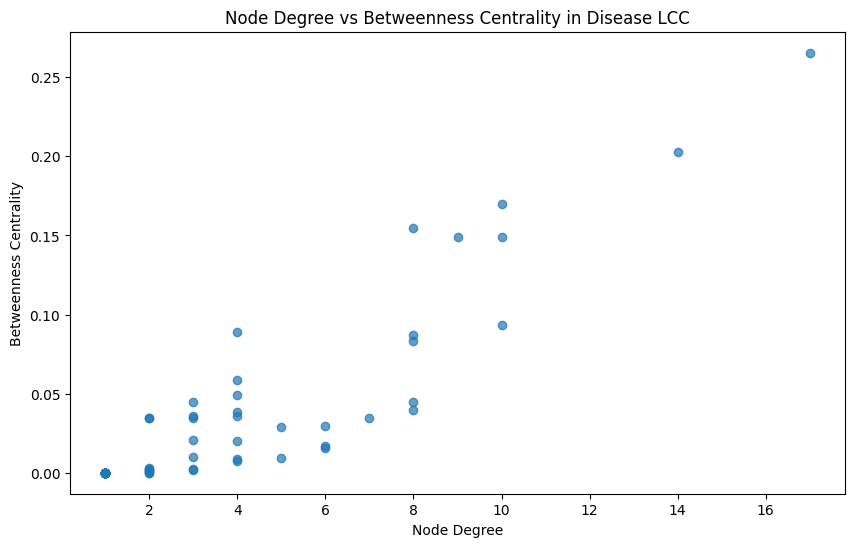

In [ ]:
# We get the scatterplot of Degree vs Betweenness
plt.figure(figsize=(10, 6))
plt.scatter(metrics_df["Degree"], metrics_df["Betweenness"], alpha=0.7)
plt.title("Node Degree vs Betweenness Centrality in Disease LCC")
plt.xlabel("Node Degree")
plt.ylabel("Betweenness Centrality")
plt.grid(False)
plt.show()

# PUNTO 2!

## PUNTO 2.1

### DIAMOND

In [ ]:
unique_interactions

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B,sorted_pair
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens,"(108607, 112315)"
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens,"(106603, 124185)"
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens,"(106605, 108625)"
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens,"(108894, 111384)"
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens,"(112038, 112651)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282704,3777836,6622,9589,112506,114957,-,RP1-56L9.4,SNCA,WTAP,NACP|PARK1|PARK4|PD1,...,NP_690597|NP_690596|NP_001257462|NP_001257460|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens,"(112506, 114957)"
1282705,3777837,6622,54915,112506,120257,-,RP5-963E22.1,SNCA,YTHDF1,NACP|PARK1|PARK4|PD1,...,NP_060268,-,-,-,-,-,-,Homo sapiens,Homo sapiens,"(112506, 120257)"
1282706,3777838,6622,51441,112506,119543,-,-,SNCA,YTHDF2,NACP|PARK1|PARK4|PD1,...,NP_001166299|NP_057342|NP_001166599,-,-,-,-,-,-,Homo sapiens,Homo sapiens,"(112506, 119543)"
1282955,3778089,128239,5884,126102,111821,-,-,IQGAP3,RAD17,-,...,NP_002864|NP_579921|NP_001265551|NP_579920|NP_...,-,-,-,-,-,-,Homo sapiens,Homo sapiens,"(111821, 126102)"


In [ ]:
#**************************************************#
#  FALLO SOLO SE LO DEVI FARE PER LA PRIMA VOLTA!  #
#**************************************************#

# We save interactome edges and seed genes
unique_interactions[["Official Symbol Interactor A", "Official Symbol Interactor B"]].to_csv(
    "/content/drive/My Drive/BIOINFORMATICS/network_file.tsv", sep="\t", index=False, header=False)

pd.DataFrame(list(disease_genes_in_lcc), columns=["Gene"]).to_csv(
    "/content/drive/My Drive/BIOINFORMATICS/seed_file.tsv", sep="\t", index=False, header=False)


In [ ]:
#**********************************************#
#  METTI DIAMOND.pY E DIaBLE.py IN CONTENTS   #
#**********************************************#
import DIAMOnD
import DiaBLE


In [ ]:
# We load the interactome as a NetworkX graph
G = nx.read_edgelist("/content/drive/My Drive/BIOINFORMATICS/network_file.tsv", delimiter="\t")

# We read seed genes
with open("/content/drive/My Drive/BIOINFORMATICS/seed_file.tsv", "r") as f:
    seed_genes = {line.strip() for line in f}

In [ ]:
#**************************************************#
#  FALLO SOLO SE LO DEVI FARE PER LA PRIMA VOLTA!  #
#**************************************************#

# Parameters for DIAMOnD
outfile_name = "/content/drive/My Drive/BIOINFORMATICS/diamond_output.tsv"

# Run DIAMOnD
added_nodes = DIAMOnD.DIAMOnD(G, seed_genes, max_number_of_added_nodes=200, alpha = 1, outfile=outfile_name)
print(added_nodes)

[('TRIM67', 4834, 49, array([8.38915087e-13])), ('SEC16A', 424, 16, array([9.51818205e-12])), ('OCIAD1', 414, 15, array([9.7333756e-11])), ('VPS13D', 63, 8, array([1.78799982e-10])), ('KIAA1429', 2935, 36, array([2.52910369e-10])), ('RPA1', 3049, 37, array([2.52766846e-10])), ('ALDH3A2', 304, 14, array([3.66475532e-11])), ('MARCH5', 201, 13, array([3.22527272e-12])), ('RHOT2', 321, 16, array([5.49121002e-13])), ('EXD2', 385, 18, array([6.07105624e-14])), ('FKBP8', 532, 21, array([1.32357238e-14])), ('TDRKH', 76, 12, array([7.72814234e-16])), ('PTPN1', 606, 24, array([1.95854212e-16])), ('AKAP1', 500, 23, array([4.69444317e-17])), ('FIS1', 208, 18, array([3.41501462e-18])), ('PEX3', 169, 17, array([2.92317479e-18])), ('UBXN4', 180, 18, array([3.7205306e-19])), ('MAVS', 292, 21, array([3.86630777e-19])), ('MTCH1', 196, 19, array([9.70830061e-20])), ('RMDN3', 312, 23, array([6.0186211e-21])), ('MFF', 177, 20, array([6.54691616e-22])), ('TOMM22', 359, 25, array([6.64299873e-22])), ('SMCR8'

In [ ]:
# Load DIAMOnD results
diamond_results = pd.read_csv("/content/drive/My Drive/BIOINFORMATICS/diamond_output.tsv", sep="\t")

# Display the first few rows
print(diamond_results.head())

   #rank DIAMOnD_node       p_hyper
0      1       TRIM67  8.389151e-13
1      2       SEC16A  9.518182e-12
2      3       OCIAD1  9.733376e-11
3      4       VPS13D  1.788000e-10
4      5     KIAA1429  2.529104e-10


In [ ]:
top_genes = diamond_results.sort_values("p_hyper").head(10)
print(top_genes)

     #rank DIAMOnD_node       p_hyper
172    173       SNAP29  1.787416e-69
168    169       VANGL2  2.341806e-69
132    133      EIF2AK3  4.401210e-69
171    172         KRAS  6.671742e-69
135    136      TMEM216  7.870799e-69
129    130        ADCY9  9.743840e-69
166    167        LAMP1  1.088355e-68
175    176          POR  1.263035e-68
170    171         STX6  1.472112e-68
133    134         SRPR  1.586131e-68


In [ ]:
print(f"Total candidate genes: {len(diamond_results)}")
print(f"Significant genes (p < 0.05): {len(diamond_results[diamond_results['p_hyper'] < 0.05])}")

Total candidate genes: 200
Significant genes (p < 0.05): 200


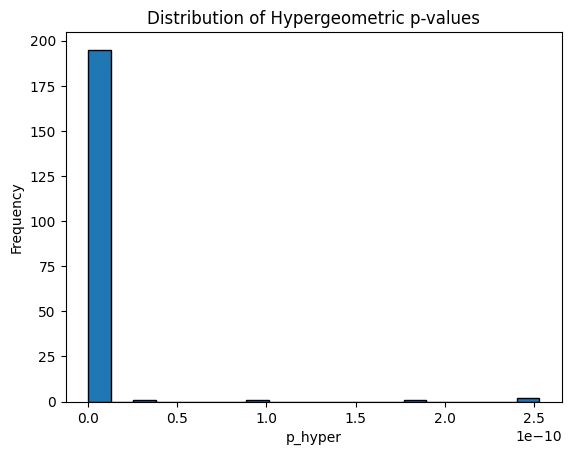

In [ ]:
plt.hist(diamond_results["p_hyper"], bins=20, edgecolor="black")
plt.title("Distribution of Hypergeometric p-values")
plt.xlabel("p_hyper")
plt.ylabel("Frequency")
plt.show()


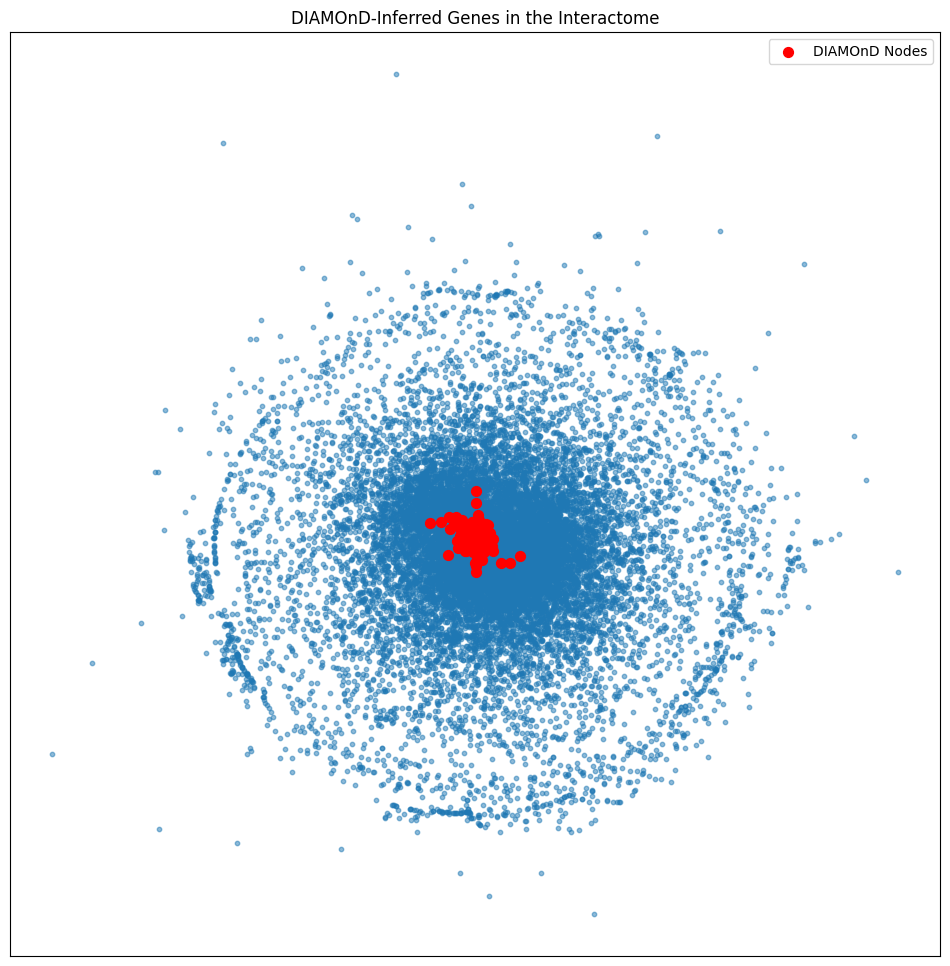

In [ ]:
#**************************************************#
#          CI METTE 30 MIN !                       #
#**************************************************#

# We plot the DIAMOnD nodes
diamond_nodes = set(diamond_results["DIAMOnD_node"])

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=10, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=diamond_nodes, node_size=50, node_color="red", label="DIAMOnD Nodes")
plt.legend()
plt.title("DIAMOnD-Inferred Genes in the Interactome")
plt.show()

### DIABLE

In [ ]:
#**************************************************#
#  FALLO SOLO SE LO DEVI FARE PER LA PRIMA VOLTA!  #
#**************************************************#

# Parameters for DiaBLE
outfile_name = "/content/drive/My Drive/BIOINFORMATICS/diable_output_A.tsv"

added_nodes = DiaBLE.DiaBLE(G, seed_genes, max_number_of_added_nodes=200, alpha = 1, outfile=outfile_name)
print(added_nodes)

[('VPS13D', 63, 7, array([6.91893439e-06])), ('OCIAD1', 414, 15, array([7.32100008e-05])), ('MARCH5', 201, 11, array([2.16009537e-05])), ('TDRKH', 76, 8, array([2.95369245e-06])), ('PEX3', 169, 10, array([3.34849973e-05])), ('FIS1', 208, 12, array([7.53393987e-06])), ('PEX11B', 33, 6, array([2.61801408e-06])), ('EXD2', 385, 17, array([4.45957811e-06])), ('USP30', 106, 10, array([7.74937513e-07])), ('RHOT2', 321, 17, array([5.03700143e-07])), ('MTFR2', 44, 8, array([7.25541336e-08])), ('AKAP1', 500, 23, array([7.00777866e-08])), ('PEX1', 86, 11, array([1.35784519e-08])), ('MTCH1', 196, 16, array([5.25793134e-09])), ('MTFR1', 68, 11, array([1.31184842e-09])), ('FAM73A', 48, 9, array([1.28612193e-08])), ('MTX2', 153, 15, array([2.10437132e-09])), ('FKBP8', 532, 27, array([1.95442198e-09])), ('UBXN4', 180, 17, array([3.98121263e-10])), ('MAVS', 292, 22, array([8.03754359e-11])), ('SMCR8', 126, 15, array([2.42152793e-10])), ('PEX14', 227, 20, array([5.87300092e-11])), ('RMDN3', 312, 24, arr

In [ ]:
# Load DIAMOnD results
diable_results = pd.read_csv("/content/drive/My Drive/BIOINFORMATICS/diable_output_A.tsv", sep="\t")

# Display the first few rows
print(diable_results.head())

   #rank DiaBLE_node   p_hyper
0      1      VPS13D  0.000007
1      2      OCIAD1  0.000073
2      3      MARCH5  0.000022
3      4       TDRKH  0.000003
4      5        PEX3  0.000033


In [ ]:
top_genes_diable = diable_results.sort_values("p_hyper").head(10)
print(top_genes_diable)

     #rank DiaBLE_node       p_hyper
199    200       ATP5J  2.940324e-22
149    150      NDUFS6  4.938636e-22
198    199        MTG2  8.131493e-22
150    151      NDUFB7  1.664113e-21
153    154      NDUFC2  2.066788e-21
148    149      NDUFB3  2.479795e-21
197    198       MTIF2  2.680679e-21
155    156      NDUFA6  3.608640e-21
152    153      NDUFB6  4.162065e-21
154    155     NDUFA11  5.169295e-21


In [ ]:
print(f"Total candidate genes: {len(diable_results)}")
print(f"Significant genes (p < 0.05): {len(diamond_results[diable_results['p_hyper'] < 0.05])}")

Total candidate genes: 200
Significant genes (p < 0.05): 200


In [ ]:
# We take a look at the number of nodes and edges in the graph
print(f"Total nodes in G: {G.number_of_nodes()}")
print(f"Total edges in G: {G.number_of_edges()}")

# We find direct neighbors of the seed genes
seed_neighbors = set()
for seed in seed_genes:
    if seed in G:
        seed_neighbors |= set(G.neighbors(seed))

# see size of the neighborhood
print(f"Number of unique neighbors of seed genes: {len(seed_neighbors)}")

# look at percentage of the graph connected to the seed genes
percentage_connected = (len(seed_neighbors) / G.number_of_nodes()) * 100
print(f"Percentage of graph directly connected to seed genes: {percentage_connected:.2f}%")


Total nodes in G: 20040
Total edges in G: 871635
Number of unique neighbors of seed genes: 6817
Percentage of graph directly connected to seed genes: 34.02%


In [ ]:
diable_results

,#rank,DiaBLE_node,p_hyper
0,1,VPS13D,6.918934e-06
1,2,OCIAD1,7.321000e-05
2,3,MARCH5,2.160095e-05
3,4,TDRKH,2.953692e-06
4,5,PEX3,3.348500e-05
...,...,...,...
195,196,VWA8,1.896595e-20
196,197,AUH,1.113614e-20
197,198,MTIF2,2.680679e-21
198,199,MTG2,8.131493e-22


In [ ]:
diable_genes = set(diable_results["DiaBLE_node"])  # Replace with the actual column name if different
diamond_genes = set(diamond_results["DIAMOnD_node"])  # Replace with the actual column name if different


In [ ]:
common_genes = diamond_genes.intersection(diable_genes)

# Genes unique to each output
unique_to_diable = diable_genes - common_genes
unique_to_diamond = diamond_genes - common_genes

# Summary
print(f"Total genes in DiaBLE output: {len(diable_genes)}")
print(f"Total genes in DIAMOnD output: {len(diamond_genes)}")
print(f"Genes common to both: {len(common_genes)}")
print(f"Genes unique to DiaBLE: {len(unique_to_diable)}")
print(f"Genes unique to DIAMOnD: {len(unique_to_diamond)}")


Total genes in DiaBLE output: 200
Total genes in DIAMOnD output: 200
Genes common to both: 39
Genes unique to DiaBLE: 161
Genes unique to DIAMOnD: 161


### Diffusion-based algorithm

In [ ]:
# Define the Heat Diffusion methods.
import operator
import copy

from numpy import array
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import expm, expm_multiply

def diffuse(matrix, heat_array, time):
    return expm_multiply(-matrix, heat_array, start=0, stop=time, endpoint=True)[-1]

def sparse_laplacian(network, normalize=False):
    if normalize:
        return csc_matrix(nx.normalized_laplacian_matrix(network))
    else:
        return csc_matrix(nx.laplacian_matrix(network))

def create_heat_array(network, seed_genes, heat_value=1.0):
    heat_list = []
    for node in network.nodes:
        if node in seed_genes:
            heat_list.append(heat_value)
        else:
            heat_list.append(0.0)

    return array(heat_list)

def filter_node_list(node_list, nodes_to_remove):
    filtered_nodes = []
    for item in node_list:
        if item[0] not in nodes_to_remove:
            filtered_nodes.append(item[0])

    return filtered_nodes

def run_heat_diffusion(network, seed_genes, diffusion_time=0.005, n_positions=None):
    # Get the sparse Lapliacian matrix of the network.
    matrix = sparse_laplacian(network, normalize=True)

    # Create heat array.
    heat_array = create_heat_array(network, seed_genes)

    # Diffuse heat.
    diffused_heat_array = diffuse(matrix, heat_array, diffusion_time)

    # Get the heat of each node.
    node_heat = {node_name: diffused_heat_array[i] for i, node_name in enumerate(network.nodes())}

    # Sort the nodes by heat value.
    sorted_nodes = sorted(node_heat.items(), key=lambda x:x[1], reverse=True)

    # Remove from the sorted nodes the seed genes.
    predicted_genes = filter_node_list(sorted_nodes, seed_genes)

    if n_positions:
        # Return the top `n_positions` genes
        # wrt their heat value.
        return predicted_genes[:n_positions]

    return predicted_genes

In [ ]:
len(seed_genes)

79

In [ ]:
diffusion_times = [0.002, 0.005, 0.01]
results = {}

for t in diffusion_times:
    predicted_genes = run_heat_diffusion(
        network=G,
        seed_genes=seed_genes,
        diffusion_time=t,
        n_positions=200)
    results[t] =  predicted_genes


In [ ]:
results[0.002][0:10],results[0.005][0:10],results[0.01][0:10]

(['SEC11C',
  'OR2A2',
  'OTOL1',
  'FGD3',
  'BCYRN1',
  'FAM178B',
  'SMLR1',
  'FAM127B',
  'OLFML3',
  'ANKRD7'],
 ['SEC11C',
  'OR2A2',
  'OTOL1',
  'FGD3',
  'BCYRN1',
  'FAM178B',
  'SMLR1',
  'FAM127B',
  'OLFML3',
  'ANKRD7'],
 ['SEC11C',
  'OR2A2',
  'OTOL1',
  'FGD3',
  'BCYRN1',
  'FAM178B',
  'SMLR1',
  'FAM127B',
  'OLFML3',
  'ANKRD7'])

## COMPUTATIONAL VALIDATION

In [ ]:

def compute_metrics(y_true, y_pred, top_k):

    top_predictions = set(y_pred[:top_k])  # Take top-k predictions
    true_positive = len(y_true.intersection(top_predictions))

    # Precision, Recall, F1-score
    precision = true_positive / top_k if top_k > 0 else 0
    recall = true_positive / len(y_true) if len(y_true) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

def sort_predictions_by_pvalue(predictions):

    # Check if predictions contain p-values
    if isinstance(predictions[0], tuple) and len(predictions[0]) == 2:
        sorted_predictions = sorted(predictions, key=lambda x: x[1])  # Sort by p-value
        return [gene for gene, _ in sorted_predictions]  # Return only genes
    else:
        return predictions  # Return as is if no p-values


def cross_validate(method, network, seed_genes, n_folds=5, diffusion_time=0.005, top_positions=None):

    from sklearn.model_selection import KFold

    # We initialize metrics
    results = {cutoff: {"precision": [], "recall": [], "f1": []} for cutoff in top_positions}

    # We split seed genes into n_folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=123)
    fold_num = 1
    for train_idx, test_idx in kf.split(seed_genes):
        print(f"Fold {fold_num}:")

        S_T = [seed_genes[i] for i in train_idx]
        S_P = set(seed_genes[i] for i in test_idx)

        # We run the chosen method
        if method.__name__ == "run_heat_diffusion":
            predictions = method(network, S_T, diffusion_time=diffusion_time)
        else:
            predictions_with_pvalues = method(network, S_T)
            predictions = sort_predictions_by_pvalue(predictions_with_pvalues)

        # We remove training set (seed genes) from predictions
        predictions = [gene for gene in predictions if gene not in S_T]

        # We evaluate at each cutoff
        for cutoff in top_positions:
            precision, recall, f1 = compute_metrics(S_P, predictions, cutoff)
            results[cutoff]["precision"].append(precision)
            results[cutoff]["recall"].append(recall)
            results[cutoff]["f1"].append(f1)

           #print(f"Cutoff: {cutoff}, Precision: {precision}, Recall: {recall}, F1: {f1}")

        fold_num += 1

    # We calculate average and standard deviation for metrics
    final_results = {}
    for cutoff, metrics in results.items():
        final_results[cutoff] = {
            "precision_mean": np.mean(metrics["precision"]),
            "precision_std": np.std(metrics["precision"]),
            "recall_mean": np.mean(metrics["recall"]),
            "recall_std": np.std(metrics["recall"]),
            "f1_mean": np.mean(metrics["f1"]),
            "f1_std": np.std(metrics["f1"]),
        }

    return final_results


In [ ]:
# we load the graph and seed genes
#G = nx.read_edgelist("/content/drive/My Drive/BIOINFORMATICS/network_file.tsv", delimiter="\t")
seed_genes=list(seed_genes)
# We define evaluation cutoffs
n = len(seed_genes)
top_positions = [50, n // 4, n // 2, n]
print(top_positions)

[50, 19, 39, 79]


In [ ]:
import tempfile

def run_DIAMOnD(graph, seeds, max_number_of_added_nodes=200, alpha=1):
    # We use a temporary file to store the output
    with tempfile.NamedTemporaryFile(delete=True) as temp_file:
        output_path = temp_file.name
        DIAMOnD.DIAMOnD(graph, seeds, max_number_of_added_nodes, alpha, outfile=output_path)
        # We load the results from the temporary file
        with open(output_path, "r") as f:
            next(f)
            results = [line.split("\t")[1] for line in f]  # We extract ranked genes
    return results

# we do the same for diable
def run_DiaBLE(graph, seeds, max_number_of_added_nodes=200, alpha=1):
  with tempfile.NamedTemporaryFile(delete=True) as temp_file:
        output_path = temp_file.name
        DiaBLE.DiaBLE(graph, seeds, max_number_of_added_nodes, alpha, outfile=output_path)
        with open(output_path, "r") as f:
            next(f)
            results = [line.split("\t")[1] for line in f]
  return results

# We make cross-validations
diamond_results = cross_validate(
    run_DIAMOnD, network=G, seed_genes=seed_genes, top_positions=top_positions)
print("DIAMOnD Results:", diamond_results)

diable_results = cross_validate(
    run_DiaBLE, network=G, seed_genes=seed_genes, top_positions=top_positions)

print("DiaBLE Results:", diable_results)

diffusion_results = cross_validate(
    run_heat_diffusion, network=G, seed_genes=seed_genes, diffusion_time=0.005, top_positions=top_positions)

print("Heat Diffusion Results:", diffusion_results)

diffusion_results1 = cross_validate(
    run_heat_diffusion, network=G, seed_genes=seed_genes, diffusion_time=0.002, top_positions=top_positions)

print("Heat Diffusion Results:", diffusion_results1)

diffusion_results2 = cross_validate(
    run_heat_diffusion, network=G, seed_genes=seed_genes, diffusion_time=0.01, top_positions=top_positions)

print("Heat Diffusion Results:", diffusion_results2)


Fold 1:
Fold 2:
Fold 3:
Fold 4:
Fold 5:
DIAMOnD Results: {50: {'precision_mean': np.float64(0.016), 'precision_std': np.float64(0.014966629547095765), 'recall_mean': np.float64(0.05083333333333333), 'recall_std': np.float64(0.047022453265552946), 'f1_mean': np.float64(0.024335664335664337), 'f1_std': np.float64(0.022702383119714176)}, 19: {'precision_mean': np.float64(0.0), 'precision_std': np.float64(0.0), 'recall_mean': np.float64(0.0), 'recall_std': np.float64(0.0), 'f1_mean': np.float64(0.0), 'f1_std': np.float64(0.0)}, 39: {'precision_mean': np.float64(0.015384615384615385), 'precision_std': np.float64(0.012561485860426554), 'recall_mean': np.float64(0.03833333333333333), 'recall_std': np.float64(0.031335992794938615), 'f1_mean': np.float64(0.021952861952861953), 'f1_std': np.float64(0.01792612323983821)}, 79: {'precision_mean': np.float64(0.010126582278481013), 'precision_std': np.float64(0.009472550346263143), 'recall_mean': np.float64(0.05083333333333333), 'recall_std': np.floa

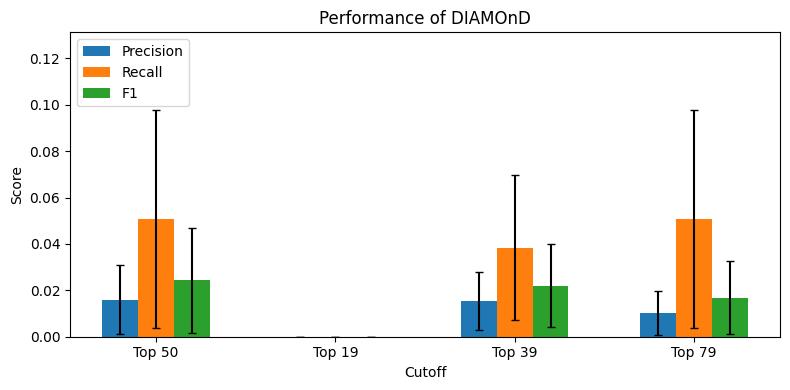

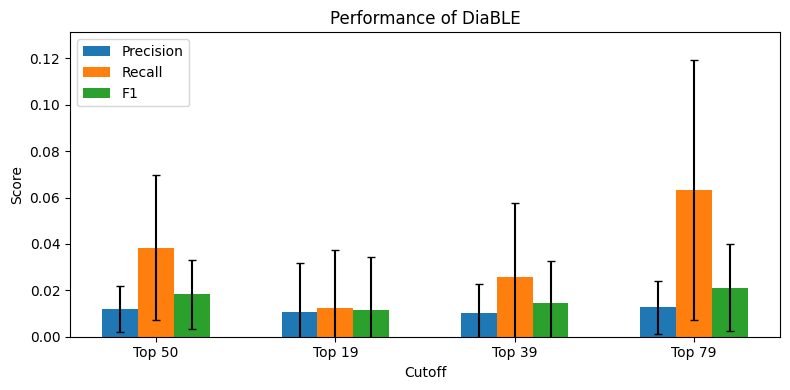

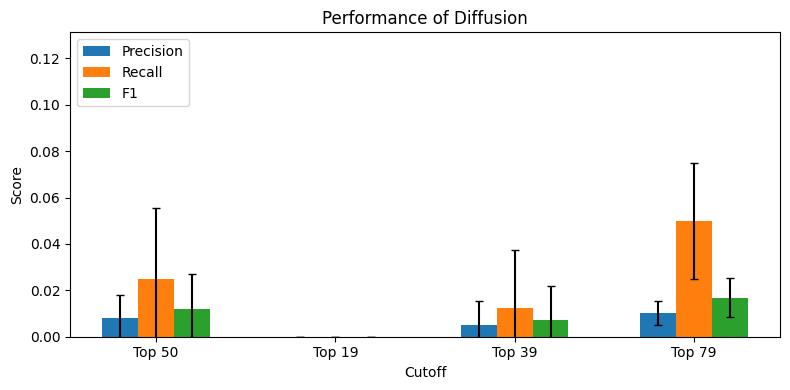

In [ ]:

def plot_results(diamond_results, diable_results, heat_diffusion_results, cutoffs):
    methods = ["DIAMOnD", "DiaBLE", "Diffusion"]
    metrics = ["precision_mean", "recall_mean", "f1_mean"]
    stds = ["precision_std", "recall_std", "f1_std"]
    bar_width = 0.2

    # We calculate max y-axis limit across all results
    max_y_lim = 0
    for method in methods:
        results = eval(f"{method.lower()}_results")
        for cutoff in cutoffs:
            for metric in metrics:
                max_y_lim = max(max_y_lim, results[cutoff][metric] + results[cutoff][stds[metrics.index(metric)]])

    # We create grouped bar chart
    x = np.arange(len(cutoffs))

    # We plot
    for method in methods:
        results = eval(f"{method.lower()}_results")  # we get results for the current method

        fig, ax = plt.subplots(figsize=(8, 4))  # We separate plot for each method

        for i, metric in enumerate(metrics):
            # Plot bars for each metric
            bars = ax.bar(
                x + i * bar_width,
                [results[cutoff][metric] for cutoff in cutoffs],
                bar_width,
                label=f"{metric.split('_')[0].capitalize()}",
            )

            # We add error bars
            for bar, cutoff in zip(bars, cutoffs):
                ax.errorbar(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_height(),
                    yerr=results[cutoff][stds[i]],
                    capsize=3,
                    color="black",
                )

        ax.set_xticks(x + bar_width)
        ax.set_xticklabels([f"Top {cutoff}" for cutoff in cutoffs])
        ax.set_xlabel("Cutoff")
        ax.set_ylabel("Score")
        ax.set_title(f"Performance of {method}")
        ax.legend(loc="upper left")

        ax.set_ylim([0, max_y_lim * 1.1])

        plt.tight_layout()
        plt.show()

cutoffs = top_positions
plot_results(diamond_results, diable_results, diffusion_results, cutoffs)

In [ ]:
diamond_results[19]

{'precision_mean': np.float64(0.0),
 'precision_std': np.float64(0.0),
 'recall_mean': np.float64(0.0),
 'recall_std': np.float64(0.0),
 'f1_mean': np.float64(0.0),
 'f1_std': np.float64(0.0)}

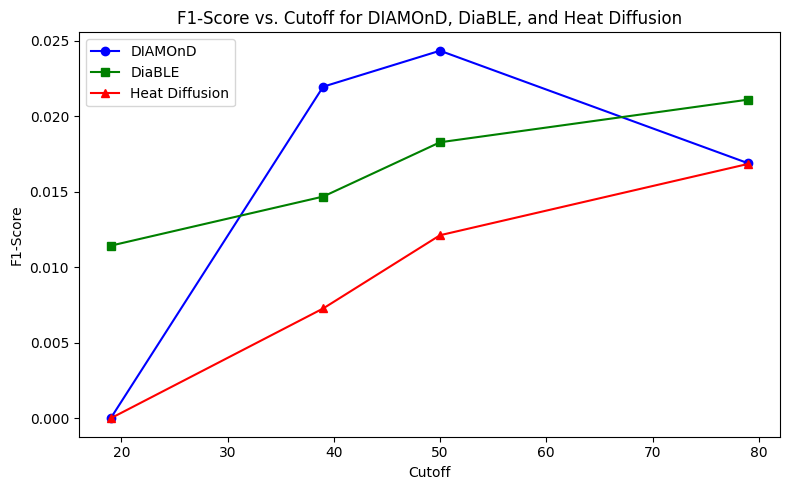

In [ ]:
import matplotlib.pyplot as plt

# Define the cutoff values
cutoffs = [19, 39, 50, 79]

# F1 scores for each method at each cutoff
diamond_f1 = [diamond_results[19]['f1_mean'],diamond_results[39]['f1_mean'],diamond_results[50]['f1_mean'],diamond_results[79]['f1_mean']]
diable_f1  = [diable_results[19]['f1_mean'],diable_results[39]['f1_mean'],diable_results[50]['f1_mean'],diable_results[79]['f1_mean']]
heat_f1    = [diffusion_results[19]['f1_mean'],diffusion_results[39]['f1_mean'],diffusion_results[50]['f1_mean'],diffusion_results[79]['f1_mean']]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cutoffs, diamond_f1, marker='o', label='DIAMOnD', color='blue')
plt.plot(cutoffs, diable_f1, marker='s', label='DiaBLE', color='green')
plt.plot(cutoffs, heat_f1, marker='^', label='Heat Diffusion', color='red')

# Labels and title
plt.xlabel('Cutoff')
plt.ylabel('F1-Score')
plt.title('F1-Score vs. Cutoff for DIAMOnD, DiaBLE, and Heat Diffusion')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Show plot
plt.show()


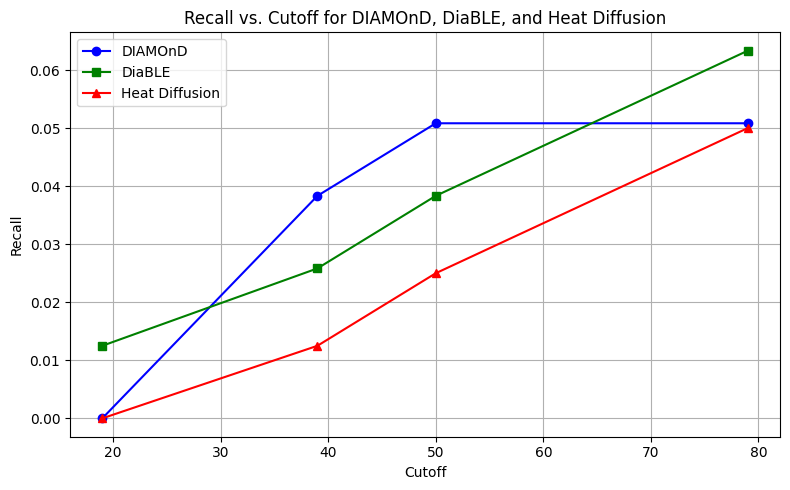

In [ ]:
# Define the cutoff values
cutoffs = [19, 39, 50, 79]

# F1 scores for each method at each cutoff
diamond_f1 = [diamond_results[19]['recall_mean'],diamond_results[39]['recall_mean'],diamond_results[50]['recall_mean'],diamond_results[79]['recall_mean']]
diable_f1  = [diable_results[19]['recall_mean'],diable_results[39]['recall_mean'],diable_results[50]['recall_mean'],diable_results[79]['recall_mean']]
heat_f1    = [diffusion_results[19]['recall_mean'],diffusion_results[39]['recall_mean'],diffusion_results[50]['recall_mean'],diffusion_results[79]['recall_mean']]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cutoffs, diamond_f1, marker='o', label='DIAMOnD', color='blue')
plt.plot(cutoffs, diable_f1, marker='s', label='DiaBLE', color='green')
plt.plot(cutoffs, heat_f1, marker='^', label='Heat Diffusion', color='red')

# Labels and title
plt.xlabel('Cutoff')
plt.ylabel('Recall')
plt.title('Recall vs. Cutoff for DIAMOnD, DiaBLE, and Heat Diffusion')
plt.legend()
plt.grid()
plt.tight_layout()

# Show plot
plt.show()

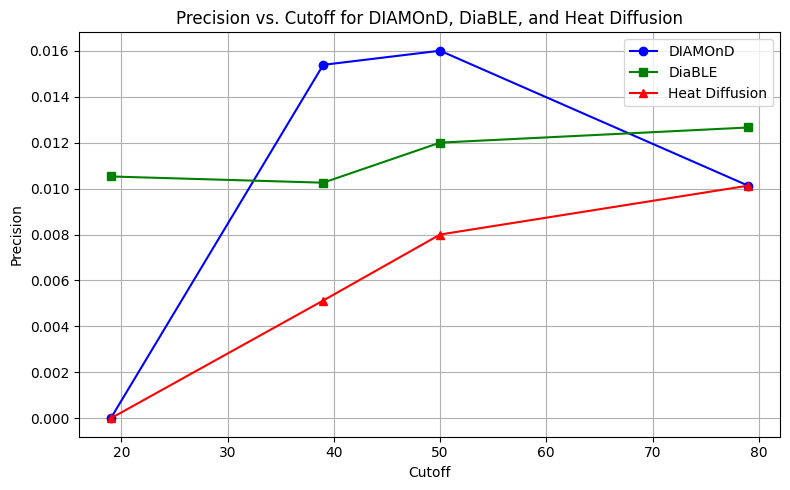

In [ ]:
# Define the cutoff values
cutoffs = [19, 39, 50, 79]

# F1 scores for each method at each cutoff
diamond_f1 = [diamond_results[19]['precision_mean'],diamond_results[39]['precision_mean'],diamond_results[50]['precision_mean'],diamond_results[79]['precision_mean']]
diable_f1  = [diable_results[19]['precision_mean'],diable_results[39]['precision_mean'],diable_results[50]['precision_mean'],diable_results[79]['precision_mean']]
heat_f1    = [diffusion_results[19]['precision_mean'],diffusion_results[39]['precision_mean'],diffusion_results[50]['precision_mean'],diffusion_results[79]['precision_mean']]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cutoffs, diamond_f1, marker='o', label='DIAMOnD', color='blue')
plt.plot(cutoffs, diable_f1, marker='s', label='DiaBLE', color='green')
plt.plot(cutoffs, heat_f1, marker='^', label='Heat Diffusion', color='red')

# Labels and title
plt.xlabel('Cutoff')
plt.ylabel('Precision')
plt.title('Precision vs. Cutoff for DIAMOnD, DiaBLE, and Heat Diffusion')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# PUNTO 3!

## 3.1

In [ ]:
 outfile_name = "/content/drive/My Drive/BIOINFORMATICS/diamond_2.tsv"
 top_predicted=DIAMOnD.DIAMOnD(G, seed_genes, max_number_of_added_nodes=200, alpha = 1, outfile=outfile_name)

In [ ]:
# Load DIAMOnD results
diamond_results = pd.read_csv("/content/drive/My Drive/BIOINFORMATICS/diamond_2.tsv", sep="\t")

# Display the first few rows
print(diamond_results.head(10))

   #rank DIAMOnD_node       p_hyper
0      1       TRIM67  8.389151e-13
1      2       SEC16A  9.518182e-12
2      3       OCIAD1  9.733376e-11
3      4       VPS13D  1.788000e-10
4      5     KIAA1429  2.529104e-10
5      6         RPA1  2.527668e-10
6      7      ALDH3A2  3.664755e-11
7      8       MARCH5  3.225273e-12
8      9        RHOT2  5.491210e-13
9     10         EXD2  6.071056e-14


In [ ]:
pdg=diamond_results['DIAMOnD_node'].iloc[:100]

### 3.2 ENRICHMENT ANALYSIS

In [ ]:
!pip install gseapy --quiet


#### 3.2.1

In [ ]:
import gseapy as gp

def enrichment_analysis(genes, gene_set_library):
    # Run enrichment analysis using Enrichr
    enrichr_results = gp.enrichr(
        gene_list=genes,                   # List of gene symbols (str)
        gene_sets=gene_set_library,       # One of Enrichr's libraries
        organism="Human",                 # Species
        outdir=None,                      # No output files needed
        cutoff=0.05                       # Only show terms with adj p < 0.05
    )

    # Extract results
    results_df = enrichr_results.results
    if results_df is None or results_df.empty:
        return pd.DataFrame()  # return empty DataFrame if nothing found

    # Filter for significant terms
    return results_df[results_df["Adjusted P-value"] < 0.05]

In [ ]:
import time

def enrichment_analysis(genes, gene_set_library, max_retries=3):
    for attempt in range(max_retries):
        try:
            enrichr_results = gp.enrichr(
                gene_list=genes,
                gene_sets=gene_set_library,
                organism="Human",
                outdir=None,
                cutoff=0.05,
            )
            df = enrichr_results.results
            if df is not None and not df.empty:
                return df[df["Adjusted P-value"] < 0.05]
            else:
                return pd.DataFrame()
        except Exception as e:
            print(f"Attempt {attempt + 1} failed for {gene_set_library}: {e}")
            time.sleep(2 * (attempt + 1))  # wait and retry
    print(f"Failed to fetch results for {gene_set_library} after {max_retries} attempts.")
    return pd.DataFrame()

In [ ]:

# we perform enrichment analysis the libraries
enrichr_libraries = [
    "GO_Biological_Process_2021",
    "GO_Molecular_Function_2021",
    "GO_Cellular_Component_2021",
    "Reactome_2022",
    "KEGG_2021_Human",
]

genes_of_interest = list(pdg)  # convert to list if not already

putative_results = {}
for library in enrichr_libraries:
    print(f"\n Enrichment analysis for {library}:")
    result = enrichment_analysis(genes_of_interest, library)
    putative_results[library] = result
    print(f"Results for {library} (Putative Genes):")
    if not result.empty:
        print(result[["Term", "Overlap", "Adjusted P-value"]].head())
    else:
        print("No significant enrichment found.")
    print(f"----------------------------------")



 Enrichment analysis for GO_Biological_Process_2021:
Results for GO_Biological_Process_2021 (Putative Genes):
                                                Term Overlap  Adjusted P-value
0  protein import into peroxisome membrane (GO:00...    7/22      7.512128e-09
1         protein targeting to membrane (GO:0006612)   10/87      7.512128e-09
2        peroxisomal membrane transport (GO:0015919)    7/27      1.407804e-08
3            mitochondrion organization (GO:0007005)  12/175      1.407804e-08
4       protein targeting to peroxisome (GO:0006625)    7/29      1.407804e-08
----------------------------------

 Enrichment analysis for GO_Molecular_Function_2021:
Results for GO_Molecular_Function_2021 (Putative Genes):
                                                Term Overlap  Adjusted P-value
0                       GTPase activity (GO:0003924)   9/216          0.000184
1    nucleoside-triphosphatase activity (GO:0017111)   9/278          0.000719
2         guanyl ribonucleotide 

<ipython-input-115-bcfbd8814ca8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=-top_df["Combined Score"], y=top_df["Term"], palette="viridis")


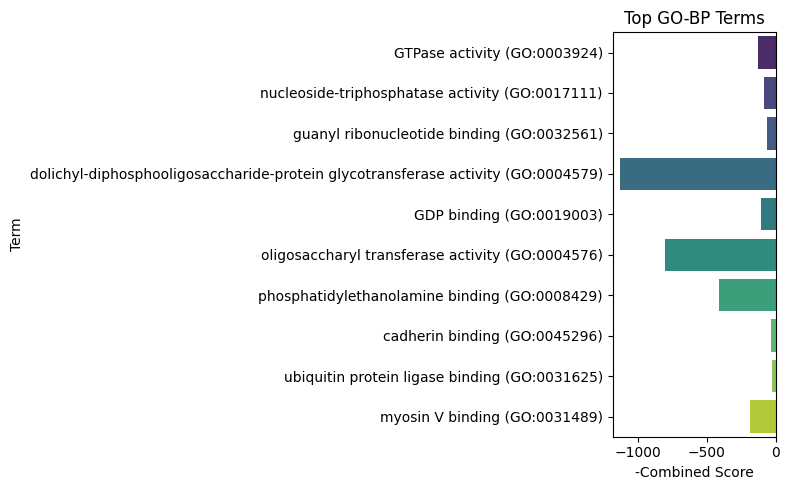

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_terms(df, title, top_n=10):
    if df.empty:
        print(f"No data to plot for {title}")
        return
    top_df = df.nsmallest(top_n, "Adjusted P-value")
    plt.figure(figsize=(8, 5))
    sns.barplot(x=-top_df["Combined Score"], y=top_df["Term"], palette="viridis")
    plt.title(title)
    plt.xlabel("-Combined Score")
    plt.tight_layout()
    plt.show()

# Example: plot GO Biological Process enrichment
plot_top_terms(putative_results["GO_Molecular_Function_2021"], "Top GO-BP Terms")


In [ ]:
original_results = {}
genes_of_interest = list(cmt_data_cor['Gene ID'].unique())
for library in enrichr_libraries:
    print(f"\n Enrichment analysis for {library}:")
    result = enrichment_analysis(genes_of_interest, library)
    original_results[library] = result
    print(f"Results for {library} (Putative Genes):")
    if not result.empty:
        print(result[["Term", "Overlap", "Adjusted P-value"]].head())
    else:
        print("No significant enrichment found.")
    print(f"----------------------------------")


 Enrichment analysis for GO_Biological_Process_2021:
Results for GO_Biological_Process_2021 (Putative Genes):
                                                Term Overlap  Adjusted P-value
0                   tRNA aminoacylation (GO:0043039)    7/38      2.447706e-07
1  tRNA aminoacylation for protein translation (G...    7/43      3.070698e-07
2          response to unfolded protein (GO:0006986)    5/49      7.117972e-04
3                           translation (GO:0006412)   8/214      7.651184e-04
4  antigen processing and presentation of exogeno...    6/98      7.651184e-04
----------------------------------

 Enrichment analysis for GO_Molecular_Function_2021:
Attempt 1 failed for GO_Molecular_Function_2021: Error sending gene list, try again later
Results for GO_Molecular_Function_2021 (Putative Genes):
                                                Term Overlap  Adjusted P-value
0        aminoacyl-tRNA ligase activity (GO:0004812)    7/38      4.457484e-08
1                    

#### 3.2.2

<ipython-input-117-452facd447b5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=-top_df["Combined Score"], y=top_df["Term"], palette="viridis")


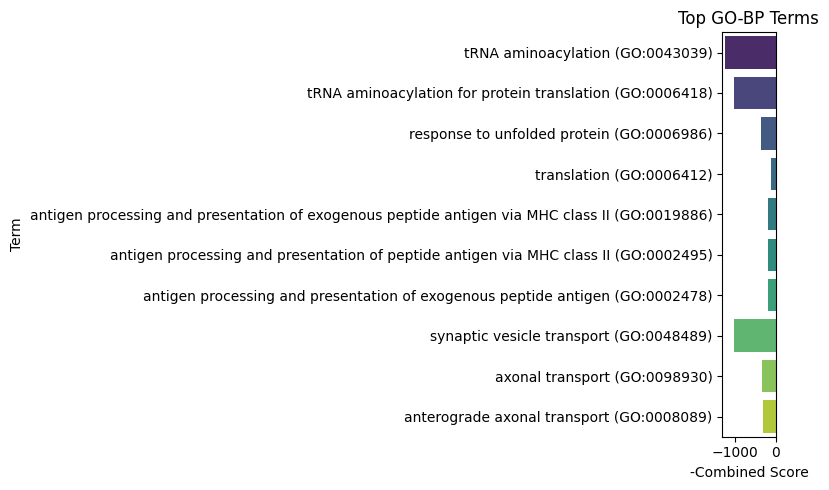

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_terms(df, title, top_n=10):
    if df.empty:
        print(f"No data to plot for {title}")
        return
    top_df = df.nsmallest(top_n, "Adjusted P-value")
    plt.figure(figsize=(8, 5))
    sns.barplot(x=-top_df["Combined Score"], y=top_df["Term"], palette="viridis")
    plt.title(title)
    plt.xlabel("-Combined Score")
    plt.tight_layout()
    plt.show()

# Example: plot GO Biological Process enrichment
plot_top_terms(original_results["GO_Biological_Process_2021"], "Top GO-BP Terms")


#### 3.2.3

In [ ]:
def get_significant_terms(results_dict):
    """
    Extract significant terms (adjusted p-value < 0.05) from results.
    Returns a dictionary of sets of enriched terms for each library.
    """
    term_dict = {}
    for lib, df in results_dict.items():
        if not df.empty:
            # Normalize term names (optional: you can also use GO/KEGG IDs instead)
            terms = set(df["Term"].str.lower().str.strip())
            term_dict[lib] = terms
        else:
            term_dict[lib] = set()
    return term_dict

# Extract sets of enriched terms
original_terms = get_significant_terms(original_results)
putative_terms = get_significant_terms(putative_results)

# Compare overlap between original and putative enriched terms
print("\n🔍 Overlap of enriched terms between original and putative gene sets:\n")

overlap_summary = {}
for lib in enrichr_libraries:
    overlap = original_terms[lib] & putative_terms[lib]
    overlap_summary[lib] = overlap
    print(f"{lib}:")
    print(f" - Original terms: {len(original_terms[lib])}")
    print(f" - Putative terms: {len(putative_terms[lib])}")
    print(f" - Overlapping terms: {len(overlap)}")
    if overlap:
        print("   ➤ Examples:", list(overlap)[:5])
    else:
        print("   ➤ No overlap found.")
    print("-" * 40)



🔍 Overlap of enriched terms between original and putative gene sets:

GO_Biological_Process_2021:
 - Original terms: 54
 - Putative terms: 80
 - Overlapping terms: 7
   ➤ Examples: ['response to unfolded protein (go:0006986)', 'establishment of protein localization to mitochondrion (go:0072655)', 'protein targeting to mitochondrion (go:0006626)', 'mitochondrial fission (go:0000266)', 'mitochondrial fusion (go:0008053)']
----------------------------------------
GO_Molecular_Function_2021:
 - Original terms: 18
 - Putative terms: 14
 - Overlapping terms: 1
   ➤ Examples: ['nucleoside-triphosphatase activity (go:0017111)']
----------------------------------------
GO_Cellular_Component_2021:
 - Original terms: 10
 - Putative terms: 30
 - Overlapping terms: 4
   ➤ Examples: ['peroxisomal membrane (go:0005778)', 'lipid droplet (go:0005811)', 'endoplasmic reticulum membrane (go:0005789)', 'microbody membrane (go:0031903)']
----------------------------------------
Reactome_2022:
 - Original t

In [ ]:
overlap_summary

{'GO_Biological_Process_2021': {'establishment of protein localization to mitochondrion (go:0072655)',
  'mitochondrial fission (go:0000266)',
  'mitochondrial fusion (go:0008053)',
  'mitochondrion organization (go:0007005)',
  'organelle organization (go:0006996)',
  'protein targeting to mitochondrion (go:0006626)',
  'response to unfolded protein (go:0006986)'},
 'GO_Molecular_Function_2021': {'nucleoside-triphosphatase activity (go:0017111)'},
 'GO_Cellular_Component_2021': {'endoplasmic reticulum membrane (go:0005789)',
  'lipid droplet (go:0005811)',
  'microbody membrane (go:0031903)',
  'peroxisomal membrane (go:0005778)'},
 'Reactome_2022': {'class i peroxisomal membrane protein import r-hsa-9603798',
  'membrane trafficking r-hsa-199991',
  'rho gtpase cycle r-hsa-9012999',
  'selective autophagy r-hsa-9663891',
  'signaling by rho gtpases r-hsa-194315',
  'signaling by rho gtpases, miro gtpases and rhobtb3 r-hsa-9716542',
  'vesicle-mediated transport r-hsa-5653656'},
 'KEG

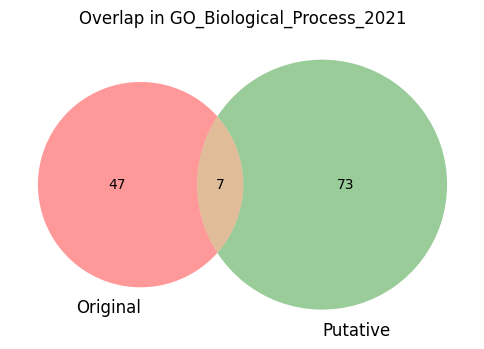

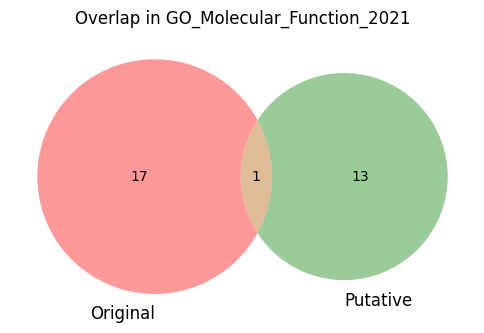

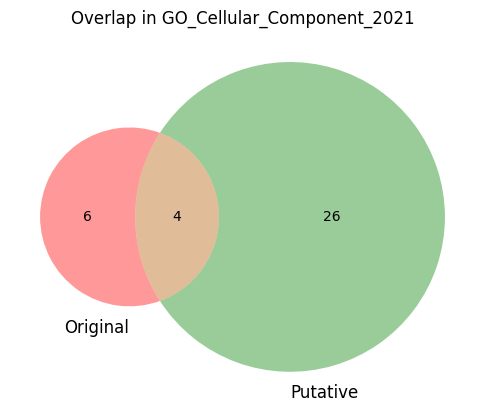

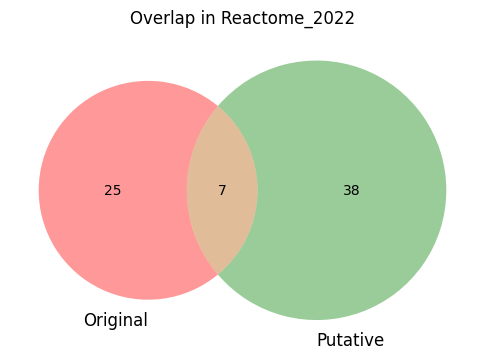

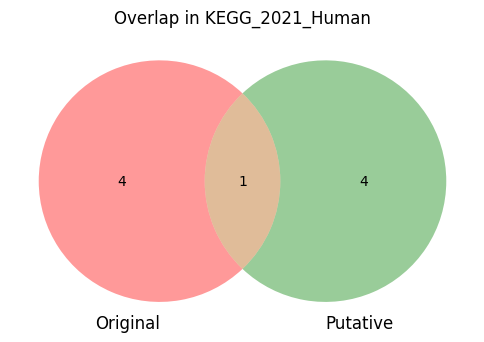

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def plot_overlap(lib):
    terms1 = original_terms[lib]
    terms2 = putative_terms[lib]

    plt.figure(figsize=(6, 6))
    venn2([terms1, terms2], set_labels=('Original', 'Putative'))
    plt.title(f"Overlap in {lib}")
    plt.show()

# Example: plot for GO_Biological_Process_2021
plot_overlap("GO_Biological_Process_2021")
plot_overlap("GO_Molecular_Function_2021")
plot_overlap("GO_Cellular_Component_2021")
plot_overlap("Reactome_2022")
plot_overlap("KEGG_2021_Human")


# PUNTO 4!

## Drug identification

4.1.1

In [ ]:
top20_putative_genes = diamond_results.head(20)["DIAMOnD_node"].tolist()


In [ ]:
top20_putative_genes

['TRIM67',
 'SEC16A',
 'OCIAD1',
 'VPS13D',
 'KIAA1429',
 'RPA1',
 'ALDH3A2',
 'MARCH5',
 'RHOT2',
 'EXD2',
 'FKBP8',
 'TDRKH',
 'PTPN1',
 'AKAP1',
 'FIS1',
 'PEX3',
 'UBXN4',
 'MAVS',
 'MTCH1',
 'RMDN3']

#### 4.1.2

In [ ]:
interactions_df = pd.read_csv("/content/drive/My Drive/BIOINFORMATICS/interactions.tsv", sep="\t", low_memory=False)

# Step 2: Filter for approved drugs
approved_interactions = interactions_df[interactions_df["approved"] == True]

# Step 3: Keep only interactions with the top 20 genes
filtered_interactions = approved_interactions[
    approved_interactions["gene_name"].isin(top20_putative_genes)
]

# Step 4: Count how many of the top 20 genes each drug targets
drug_gene_info = (
    filtered_interactions.groupby("drug_name")["gene_name"]
    .agg(["nunique", lambda genes: ", ".join(sorted(set(genes)))])
    .reset_index()
    .rename(columns={"nunique": "num_targeted_genes", "<lambda_0>": "target_genes"})
    .sort_values(by="num_targeted_genes", ascending=False)
)

# Step 4: Display the final result
print("Ranked list of approved drugs with associated top-20 genes:")
print(drug_gene_info.head(1000))

Ranked list of approved drugs with associated top-20 genes:
                 drug_name  num_targeted_genes target_genes
0             CAPECITABINE                   1       VPS13D
1               DISULFIRAM                   1      ALDH3A2
2  INSULIN, REGULAR, HUMAN                   1        PTPN1
3          TILUDRONIC ACID                   1        PTPN1


https://clinicaltrials.gov/search?cond=Charcot-Marie-Tooth%20Disease&term=Insulin

# PUNTO 5!

In [ ]:
#**********************************************#
#       METTI PROCONSUL.py IN CONTENTS         #
#**********************************************#

In [ ]:
import proconsul

In [ ]:
node_ranks=proconsul.PROCONSUL(G,seed_genes,max_number_of_added_nodes=200,
                    alpha=1,outfile="/content/drive/My Drive/BIOINFORMATICS/proconsul.tsv")

PROCONSUL(): Round 1/10
PROCONSUL(): Round 2/10
PROCONSUL(): Round 3/10
PROCONSUL(): Round 4/10
PROCONSUL(): Round 5/10
PROCONSUL(): Round 6/10
PROCONSUL(): Round 7/10
PROCONSUL(): Round 8/10
PROCONSUL(): Round 9/10
PROCONSUL(): Round 10/10


In [ ]:
node_ranks=pd.read_csv("/content/drive/My Drive/BIOINFORMATICS/proconsul.tsv", sep="\t", low_memory=False)


In [ ]:
node_ranks['node'].iloc[0:20]

,node
0,TRIM67
1,SEC16A
2,OCIAD1
3,PTPN1
4,VPS13D
5,EXD2
6,ALDH3A2
7,TDRKH
8,FKBP8
9,RHOT2


In [ ]:
# === STEP 3: Get top 20 predicted genes ===
ranked_genes =node_ranks['node'].iloc[0:20]  # Descending


# === STEP 4: Compare to known top20_putative_genes ===
overlap = set(top20_putative_genes) & set(ranked_genes)
print("\nTop 20 Predicted Genes:")
print(ranked_genes)

print("\nOverlap with known top-20 putative genes:")
print(overlap)
print(f"\nNumber of overlapping genes: {len(overlap)}")


Top 20 Predicted Genes:
0      TRIM67
1      SEC16A
2      OCIAD1
3       PTPN1
4      VPS13D
5        EXD2
6     ALDH3A2
7       TDRKH
8       FKBP8
9       RHOT2
10     MARCH5
11      AKAP1
12      MTCH1
13       FIS1
14      UBXN4
15       MAVS
16     TOMM22
17      SMCR8
18      WDR41
19      RMDN3
Name: node, dtype: object

Overlap with known top-20 putative genes:
{'TDRKH', 'RHOT2', 'UBXN4', 'RMDN3', 'PTPN1', 'SEC16A', 'OCIAD1', 'FIS1', 'MAVS', 'TRIM67', 'VPS13D', 'MARCH5', 'AKAP1', 'EXD2', 'FKBP8', 'ALDH3A2', 'MTCH1'}

Number of overlapping genes: 17


In [ ]:
set(ranked_genes)-set(top20_putative_genes)

{'SMCR8', 'TOMM22', 'WDR41'}